# **Trabalho 01**
Grupo: Juliana Caldas, Luiza Loures, Marcela Crespo e Pedro Bebber

In [ ]:
!pip install --upgrade pandas
!pip install --upgrade google-colab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 27.7 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 92.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 65.5 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.3
    Uninstalling pandas-2.2.3:
      Successfully uninstalled pandas-2.2.3


In [ ]:
import pandas as pd

def carregar_dados():
    # Caminhos dos arquivos no ambiente do Colab
    caminho_campanhas = 'campanhas.csv'
    caminho_clientes = 'clientes.csv'
    caminho_transacoes = 'transacoes.csv'

    # Leitura dos arquivos CSV
    df_campanhas = pd.read_csv(caminho_campanhas)
    df_clientes = pd.read_csv(caminho_clientes)
    df_transacoes = pd.read_csv(caminho_transacoes)

    return df_campanhas, df_clientes, df_transacoes


In [ ]:
df_campanhas, df_clientes, df_transacoes = carregar_dados()

# Exemplo: visualizar as primeiras linhas de cada DataFrame
df_campanhas.head(), df_clientes.head(), df_transacoes.head()


(   campanha_id   nome_campanha  custo_campanha  alcance  conversao
 0            1    black_friday           16361     3245        497
 1            2           natal            9721     1242        442
 2            3        dia_maes           12684     4650        264
 3            4        dia_pais           12198     3033         64
 4            5  volta_as_aulas           13136     2337        196,
    cliente_id  idade  renda_mensal        cidade tipo_cliente  ultima_compra  \
 0           1     56          2590      Curitiba    ocasional             63   
 1           2     69          5305        Manaus    frequente            104   
 2           3     46          3865  Porto Alegre    frequente            339   
 3           4     32          2866  Porto Alegre    ocasional            359   
 4           5     60          4030  Porto Alegre      premium            156   
 
    frequencia_compras  total_gasto  
 0                  12         6779  
 1                   4     

# **Cluster Analysis**

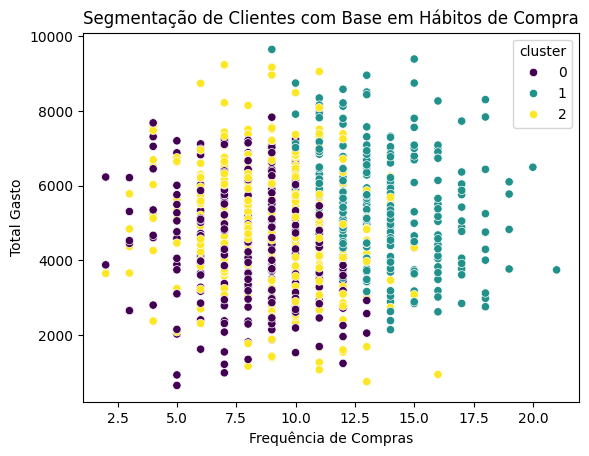

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

#X_cluster = df[["frequencia_compras", "total_gasto", "ultima_compra"]]
X_cluster = df_clientes[["frequencia_compras", "total_gasto", "ultima_compra"]]

scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

kmeans = KMeans(n_clusters=3, random_state=42)
df_clientes['cluster'] = kmeans.fit_predict(X_cluster_scaled)

sns.scatterplot(x='frequencia_compras', y='total_gasto', hue='cluster', data=df_clientes, palette='viridis')
plt.title("Segmentação de Clientes com Base em Hábitos de Compra")
plt.xlabel("Frequência de Compras")
plt.ylabel("Total Gasto")
plt.show()

A análise revelou grupos com comportamentos distintos, o que permite direcionar campanhas personalizadas: por exemplo, incentivar a frequência em quem já gasta muito, ou aumentar o ticket médio de clientes frequentes. Por isso, é importante para empresa adaptar sua comunicação e ofertas para cada grupo.

# **Conjoint Analysis**

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

def carregar_dados():
  caminho_campanhas = 'campanhas.cvs'
  caminho_transacoes = 'transacoes.cvs'

  df_campanhas = pd.read_csv(caminho_campanhas)
  df_transacoes = pd.read_csv(caminho_transacoes)

  return df_campanhas, df_transacoes

In [ ]:
df_transacoes['campanha'] = pd.to_numeric(df_transacoes['campanha'], errors='coerce')

df_conjoint_merge = pd.merge(df_transacoes, df_campanhas, left_on="campanha", right_on="campanha_id", how="left")

n_respostas = len(df_conjoint_merge)

conjoint_data = {
    "desconto": np.random.choice([0,1], size=n_respostas),
    "frete_gratis": np.random.choice([0,1], size=n_respostas),
    "brindes": np.random.choice([0,1], size=n_respostas),
    "escolha": np.random.choice([0,1], size=n_respostas, p=[0.4, 0.6])
}
df_conjoint = pd.DataFrame(conjoint_data)


Optimization terminated successfully.
         Current function value: 0.667871
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                escolha   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4996
Method:                           MLE   Df Model:                            3
Date:                Wed, 09 Apr 2025   Pseudo R-squ.:               0.0006393
Time:                        14:41:36   Log-Likelihood:                -3339.4
converged:                       True   LL-Null:                       -3341.5
Covariance Type:            nonrobust   LLR p-value:                    0.2335
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.5049      0.058      8.724      0.000       0.391       0.618
desconto        -0.1138

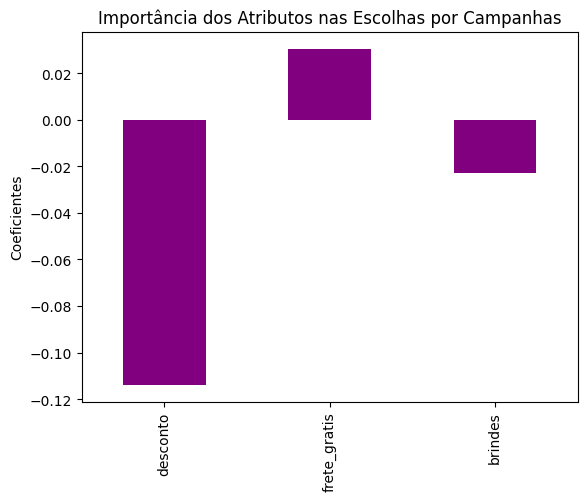

In [ ]:
X = df_conjoint_merge[["desconto", "frete_gratis", "brindes"]]
X= sm.add_constant(X)
y = df_conjoint_merge["escolha"]

model = sm.Logit(y, X)
result = model.fit()

print(result.summary())

coeficientes = result.params.drop("const")
coeficientes.plot(kind="bar", color="purple")
plt.title("Importância dos Atributos nas Escolhas por Campanhas")
plt.ylabel("Coeficientes")
plt.show()

A análise conjunta demonstrou que o desconto é o atributo mais valorizado pelos clientes, seguido por frete grátis e brindes. Esse insight pode orientar a direcionar a verba das campanhas para os atributos mais valorizados pelos clientes.

# **Regressão Linear**

Coeficientes: [[ 6.28690018  0.01676508 13.94993423]]


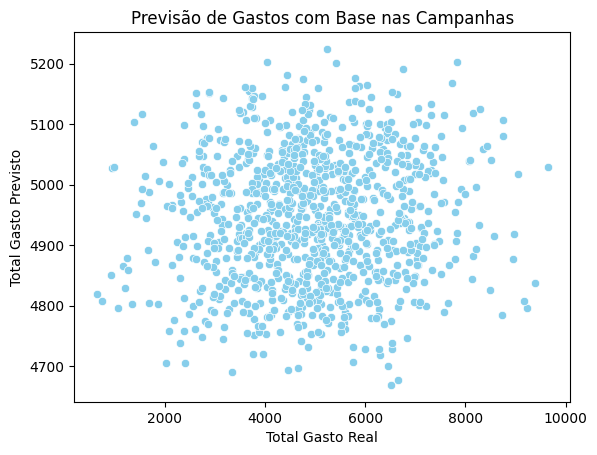

In [ ]:
from sklearn.linear_model import LinearRegression

X_reg = df_clientes[["idade", "renda_mensal", "frequencia_compras"]]
y_reg = df_clientes[["total_gasto"]]

model = LinearRegression()
model.fit(X_reg, y_reg)

print("Coeficientes:", model.coef_)

df_clientes["total_gasto_previsto"] = model.predict(X_reg)

sns.scatterplot(x="total_gasto", y="total_gasto_previsto", data=df_clientes, color="skyblue")
plt.title("Previsão de Gastos com Base nas Campanhas")
plt.xlabel("Total Gasto Real")
plt.ylabel("Total Gasto Previsto")
plt.show()

Esse gráfico mostra se conseguimos prever quanto um cliente vai gastar, com base em algumas informações que temos sobre ele, como idade, renda mensal e frequência de compras.
Cada ponto no gráfico representa um cliente. O eixo horizontal mostra quanto ele realmente gastou, e o eixo vertical mostra quanto o modelo previu que ele gastaria.Se os pontos estiverem perto da linha diagonal (onde o valor real e o previsto são iguais), isso quer dizer que o modelo está acertando bem. Mas se os pontos estiverem muito espalhados, significa que o modelo está errando bastante. Ou seja, quanto mais os pontos estiverem alinhados com essa linha imaginária, melhor a previsão do modelo.


# **Customer Lifetime Value (CLV)**

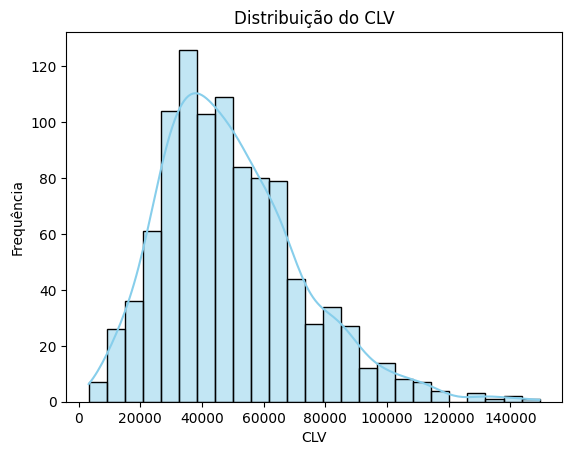

In [ ]:
df_clientes["clv"] = df_clientes["total_gasto"] * df_clientes["frequencia_compras"]

df_clientes["clv_valor_alto"] = df_clientes["clv"]> df_clientes["clv"].quantile(0.9)

sns.histplot(df_clientes["clv"], bins=25, kde=True, color="skyblue")
plt.title("Distribuição do CLV")
plt.xlabel("CLV")
plt.ylabel("Frequência")
plt.show()

A análise de CLV revelou que uma parcela dos clientes representa uma grande parte da receita futura esperada. Identificar esses clientes permite tratá-los de forma diferenciada, com ações de fidelização ou benefícios exclusivos.

In [ ]:
#Clientes de Alto Valor
clientes_alto_valor = df_clientes[df_clientes["clv_valor_alto"]]
print("Clientes de Alto Valor:")
print(clientes_alto_valor[["cliente_id", "clv"]].head())


Clientes de Alto Valor:
    cliente_id    clv
0            1  81348
20          21  82524
23          24  91788
36          37  98449
48          49  97524


**Comparando CLV por Campanha**

In [ ]:
# Juntando transações com clientes
df_trans_clientes = df_transacoes.merge(df_clientes, on="cliente_id", how="left")

# Juntando com campanhas (usando o nome da campanha)
df_completo = df_trans_clientes.merge(df_campanhas, left_on="campanha", right_on="nome_campanha", how="left")

df_completo["clv"] = df_completo["total_gasto"] * df_completo["frequencia_compras"]

CLV médio por campanha:
campanha
black_friday      50131.920160
natal             49544.111801
dia_maes          49437.121756
ano_novo          49284.139676
volta_as_aulas    49037.610503
sem_campanha      48702.068695
dia_pais          48620.507605
Name: clv, dtype: float64


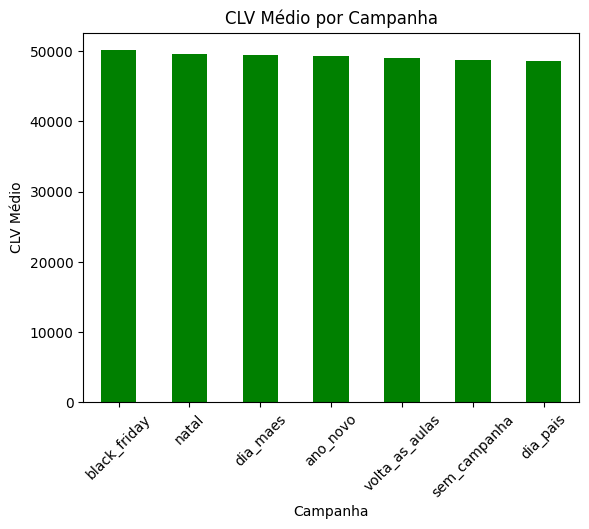

In [ ]:
clv_por_campanha = df_completo.groupby("campanha")["clv"].mean().sort_values(ascending=False)

print("CLV médio por campanha:")
print(clv_por_campanha)

# Visualizar
import matplotlib.pyplot as plt

clv_por_campanha.plot(kind="bar", color="green")
plt.title("CLV Médio por Campanha")
plt.ylabel("CLV Médio")
plt.xlabel("Campanha")
plt.xticks(rotation=45)
plt.show()


Essa visualização aponta que as campanhas parecem populares, trazendo clientes com maior potencial de lucro no longo prazo. No entanto, a campanha de Black Friday se destacou mais entre os clientes. Com essa análise, é possível otimizar o investimento em marketing, priorizando ações que gerem maior valor agregado.